In [1]:
import numpy as np
from utils.distributions import Gaussian, TiltedGaussian, RoughWell, GMM
from utils.func_utils import acl_spectrum
from utils.sampler import chain_operator, propose
from utils.dynamics import Dynamics
import torch
import train
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x_dim = 2

mus = [np.zeros(2,), 3.4 * np.ones(2,)]
sigmas = [np.array([[0.3, 0], [0, 0.3]]), np.array([[0.4, 0.2], [0.2, 1]])]
pis = [0.5, 0.5]

distribution = GMM(mus, sigmas, pis)

In [3]:
true_samples = distribution.get_samples(1000)

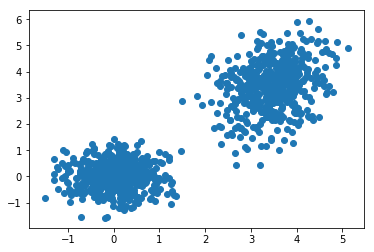

In [4]:
plt.scatter(true_samples[:, 0], true_samples[:, 1])
plt.show()

In [5]:
dyn = train.train(distribution, x_dim)

loss: tensor(684.0300)
loss: tensor(-1.4662)
loss: tensor(-8.1739)
loss: tensor(-12.2544)
loss: tensor(-13.3439)
loss: tensor(-18.3427)
loss: tensor(-24.8271)
loss: tensor(-28.8373)
loss: tensor(-35.8701)
loss: tensor(-39.8480)
loss: tensor(-38.1464)
loss: tensor(-46.6057)
loss: tensor(-45.8013)
loss: tensor(-51.0899)
loss: tensor(-54.9056)
loss: tensor(-51.9304)
loss: tensor(-51.5964)
loss: tensor(-54.8207)
loss: tensor(-56.0988)
loss: tensor(-49.1364)
loss: tensor(-61.4337)
loss: tensor(-51.9652)
loss: tensor(-60.3715)
loss: tensor(-64.0960)
loss: tensor(-57.7354)
loss: tensor(-60.0971)
loss: tensor(-65.4547)
loss: tensor(-74.5136)
loss: tensor(-63.5771)
loss: tensor(-74.5806)


In [6]:
final_samples = []
x = distribution.get_samples(n=1)
x = torch.FloatTensor(x)
for i in range(200):
    Lx, _, px, output = propose(x, dyn, do_mh_step=True)
    x = output[0].data
    final_samples.append(x)

In [7]:
fs = np.array([fss.numpy() for fss in final_samples])

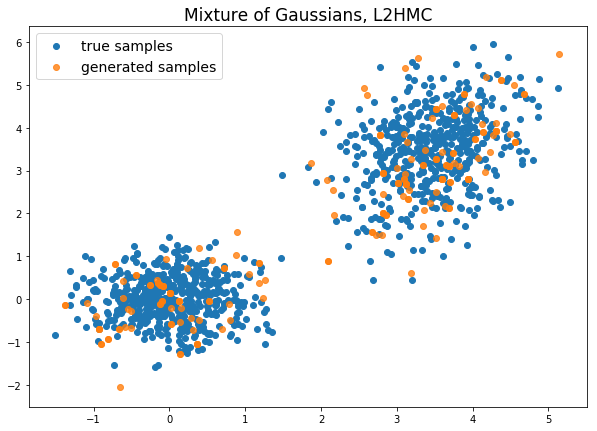

In [9]:
plt.figure(figsize=(10, 7))
plt.scatter(true_samples[:, 0], true_samples[:, 1], label="true samples")
plt.scatter(fs[:, 0, 0], fs[:, 0, 1], alpha=0.8, label="generated samples")
plt.legend(prop={'size': 14})
plt.title("Mixture of Gaussians, L2HMC", fontsize=17)
#plt.savefig("Strongly_Correlated_Gaussian_L2HMC.png", dpi=200)
plt.show()

In [10]:
def get_hmc_samples(x_dim, eps, energy_function, T=10, steps=200, samples=None):
    hmc_dynamics = Dynamics(x_dim, energy_function, T=T, eps=eps, hmc=True)

    final_samples = []
    hmc_x = torch.randn(size=(1, x_dim)).float()

    for t in range(steps):
        Lx, _, px, hmc_MH = propose(hmc_x, hmc_dynamics, do_mh_step=True)
        hmc_x = hmc_MH[0]
        final_samples.append(hmc_x)

    return final_samples

In [11]:
hmc_samples = get_hmc_samples(x_dim, 0.05, distribution.get_energy_function())

In [12]:
hmc_fs = np.array([fss.numpy() for fss in hmc_samples])

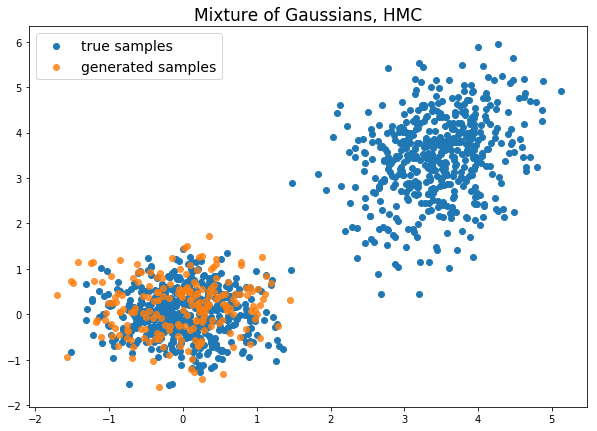

In [14]:
plt.figure(figsize=(10, 7))
plt.scatter(true_samples[:, 0], true_samples[:, 1], label="true samples")
plt.scatter(hmc_fs[:, 0, 0], hmc_fs[:, 0, 1], alpha=0.8, label="generated samples")
plt.legend(prop={'size': 14})
plt.title("Mixture of Gaussians, HMC", fontsize=17)
plt.show()

In [2]:
x_dim = 2
mu = np.zeros(2,)
cov = np.array([[50.05, -49.95], [-49.95, 50.05]])

distribution = Gaussian(mu, cov)

In [3]:
true_samples = distribution.get_samples(1000)

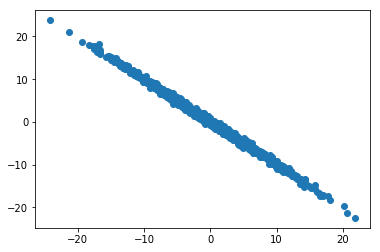

In [4]:
plt.scatter(true_samples[:, 0], true_samples[:, 1])
plt.show()

In [5]:
dyn = train.train(distribution, x_dim)

loss: tensor(717.8299)
loss: tensor(28.5350)
loss: tensor(3.0157)
loss: tensor(-60.6704)
loss: tensor(-83.7323)
loss: tensor(-141.7649)
loss: tensor(-134.3520)
loss: tensor(-204.4192)
loss: tensor(-196.1398)
loss: tensor(-228.7705)
loss: tensor(-99.1877)
loss: tensor(-228.3379)
loss: tensor(-273.1662)
loss: tensor(-241.6588)
loss: tensor(-279.8705)
loss: tensor(-401.9814)
loss: tensor(-494.9614)
loss: tensor(-587.9276)
loss: tensor(-662.1588)
loss: tensor(-1136.3898)
loss: tensor(-1421.2468)
loss: tensor(-2008.5183)
loss: tensor(-2662.1702)
loss: tensor(-3277.7922)
loss: tensor(-3773.5793)
loss: tensor(-4115.4629)
loss: tensor(-3746.4114)
it: 2627


In [6]:
final_samples = []
x = distribution.get_samples(n=1)
x = torch.FloatTensor(x)
for i in range(200):
    Lx, _, px, output = propose(x, dyn, do_mh_step=True)
    x = output[0].data
    final_samples.append(x)

In [7]:
fs = np.array([fss.numpy() for fss in final_samples])

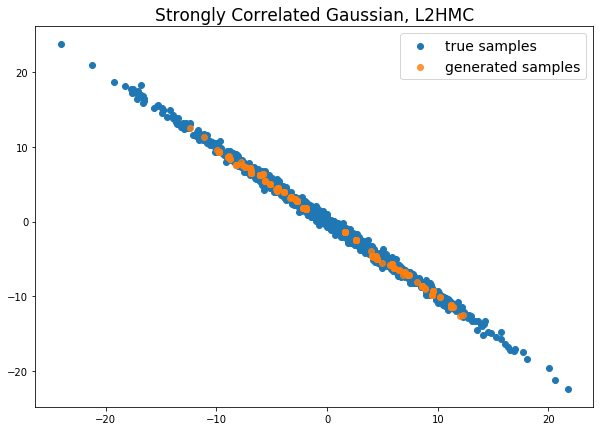

In [8]:
plt.figure(figsize=(10, 7))
plt.scatter(true_samples[:, 0], true_samples[:, 1], label="true samples")
plt.scatter(fs[:, 0, 0], fs[:, 0, 1], alpha=0.8, label="generated samples")
plt.legend(prop={'size': 14})
plt.title("Strongly Correlated Gaussian, L2HMC", fontsize=17)
plt.show()

In [9]:
def get_hmc_samples(x_dim, eps, energy_function, T=10, steps=200, samples=None):
    hmc_dynamics = Dynamics(x_dim, energy_function, T=T, eps=eps, hmc=True)

    final_samples = []
    hmc_x = torch.randn(size=(1, x_dim)).float()

    for t in range(steps):
        Lx, _, px, hmc_MH = propose(hmc_x, hmc_dynamics, do_mh_step=True)
        hmc_x = hmc_MH[0]
        final_samples.append(hmc_x)

    return final_samples

In [10]:
hmc_samples = get_hmc_samples(x_dim, 0.05, distribution.get_energy_function())

In [11]:
hmc_fs = np.array([fss.numpy() for fss in hmc_samples])

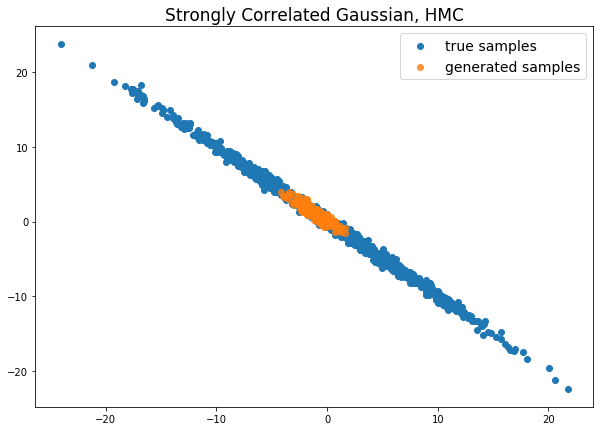

In [12]:
plt.figure(figsize=(10, 7))
plt.scatter(true_samples[:, 0], true_samples[:, 1], label="true samples")
plt.scatter(hmc_fs[:, 0, 0], hmc_fs[:, 0, 1], alpha=0.8, label="generated samples")
plt.legend(prop={'size': 14})
plt.title("Strongly Correlated Gaussian, HMC", fontsize=17)
plt.show()